In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [3]:
def z_score(data,time_line):
   
    rolling_average = data.rolling(window=time_line).mean()
    rolling_st = data.rolling(window=time_line).std()
    rolling_df = pd.DataFrame({"data":data.values,"rolling_av":rolling_average.values,"rolling_st":rolling_st.values},index=data.index)[time_line-1:]
    return (rolling_df.data-rolling_df.rolling_av)/(rolling_df.rolling_st)

이후 Z Score 계산을 위한 function 정의

In [4]:
time_line = 36
criteria_line = 0

데이터 계산 기준을 36개월로 맞추기 위해 time_line 을 36으로 설정하였고, 최종 수치 결과가 0 이상이면 매수 추천, 0 이하이면 매도 추천으로 설정하기 위하여 criteria_line은 0으로 설정

In [11]:
cycle_data = pd.read_csv('./data/markit_pmis.csv',index_col='Date',parse_dates=True)

In [12]:
cycle_data

,USD,EUR,GBP,JPY,INR,CNY,CAD,BRL,RUB,CZK,AUD,NZD,CHF,SEK,NOK
Date,,,,,,,,,,,,,,,
2007-05-31,57.2,55.0,53.5,51.4,53.4,54.1,NaN,54.3,54.4,55.8,54.7,55.4,59.9,58.8,60.54
2007-06-30,53.5,55.6,53.9,50.4,53.2,55.0,NaN,54.9,53.0,57.7,54.6,51.4,62.9,58.9,57.95
2007-07-31,53.4,54.9,54.8,49.0,52.9,53.2,NaN,54.8,53.4,59.5,56.0,54.0,62.6,58.1,55.90
2007-08-31,54.1,54.3,54.9,49.6,57.9,53.4,NaN,54.9,53.1,58.8,52.6,56.6,63.0,57.4,59.23
2007-09-30,54.9,53.2,54.9,49.8,59.3,55.0,NaN,56.4,52.2,55.8,49.0,54.2,59.4,57.6,56.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,63.4,62.8,60.4,53.0,55.3,50.3,56.2,56.7,47.5,62.0,60.8,60.8,71.1,64.9,63.02
2021-08-31,61.1,61.4,60.3,52.7,52.3,49.2,57.2,53.6,46.5,61.0,51.6,51.6,67.7,60.1,61.92
2021-09-30,60.7,58.6,57.1,51.5,53.7,50.0,57.0,54.4,49.8,58.0,51.2,51.2,68.1,64.6,59.45


In [15]:
momentum_data = pd.read_csv('./data/fx_monthly.csv',index_col='Date', parse_dates=True)

In [16]:
momentum_data

,EUR,GBP,JPY,INR,CNY,CAD,BRL,RUB,CZK,AUD,NZD,CHF,SEK,NOK
Date,,,,,,,,,,,,,,
2006-10-31,1.2762,1.9074,0.008549,0.022223,0.12692,0.8911,0.4650,0.03735,0.044920,0.7738,0.6704,0.8037,0.138442,0.1529
2006-11-30,1.3242,1.9659,0.008635,0.022344,0.12766,0.8770,0.4613,0.03802,0.047162,0.7889,0.6842,0.8348,0.146029,0.1624
2006-12-31,1.3197,1.9588,0.008399,0.022595,0.12800,0.8578,0.4676,0.03796,0.047880,0.7885,0.7039,0.8196,0.146019,0.1604
2007-01-31,1.3032,1.9655,0.008285,0.022633,0.12864,0.8497,0.4679,0.03764,0.045745,0.7769,0.6912,0.8038,0.143910,0.1602
2007-02-28,1.3229,1.9639,0.008435,0.022585,0.12913,0.8547,0.4720,0.03822,0.046622,0.7879,0.7014,0.8199,0.142960,0.1631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,1.1870,1.3904,0.009117,0.013438,0.15475,0.8019,0.1968,0.01371,0.046676,0.7344,0.6974,1.1045,0.116364,0.1133
2021-08-31,1.1809,1.3755,0.009091,0.013706,0.15473,0.7927,0.1929,0.01364,0.046341,0.7316,0.7045,1.0926,0.115952,0.1151
2021-09-30,1.1580,1.3474,0.008987,0.013459,0.15471,0.7885,0.1846,0.01373,0.045333,0.7227,0.6899,1.0735,0.114119,0.1143


In [17]:
yield_diff_data = pd.read_csv('./data/st_yield_diff.csv',index_col='Date', parse_dates=True)

In [18]:
yield_diff_data

,usgg2yr index,GTEUR2Y Govt,GTGBP2Y Govt,GTJPY2Y Govt,IRSWN2 index,GTCNY2Y Govt,GTCAD2Y Govt,GTBRL2Y Govt,GTRUB2Y Govt,GTCZK2Y Govt,GTAUD2Y govt,GTNZD2Y govt,GTCHF2Y govt,GTSEK2Y govt,NKSW2 index
Date,,,,,,,,,,,,,,,
2007-05-31,4.9081,4.394,5.7460,0.984,7.525,2.959,4.581,NaN,NaN,3.463,6.2570,7.208,2.812,4.027,5.5999
2007-06-29,4.8582,4.462,5.7710,1.025,7.750,3.249,4.589,NaN,NaN,3.803,6.4570,7.326,2.888,4.214,5.7800
2007-07-31,4.5174,4.299,5.5590,0.986,6.700,3.292,4.623,NaN,NaN,3.815,6.4270,7.828,2.821,4.318,5.7355
2007-08-31,4.1320,4.013,5.3620,0.880,6.900,3.264,4.350,NaN,NaN,3.834,6.2500,7.127,2.613,4.129,5.6697
2007-09-28,3.9835,4.028,5.0700,0.870,6.050,3.538,4.081,NaN,NaN,3.847,6.4330,6.932,2.508,4.091,5.6550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30,0.1839,-0.767,0.0540,-0.128,4.935,2.423,0.448,8.39870,6.760,1.326,0.0368,0.911,-0.779,-0.333,0.9970
2021-08-31,0.2093,-0.722,0.2159,-0.131,4.730,2.458,0.422,9.04045,6.810,1.588,0.0100,1.157,-0.762,-0.302,1.1160
2021-09-30,0.2755,-0.695,0.4051,-0.128,5.010,2.473,0.527,9.69880,7.235,1.935,0.0425,1.215,-0.781,-0.291,1.3290


- 각국의 경기 상황 격차를 계산하기 위하여 각국의 제조업 PMI 데이터를 cycle_data로 불러옴
- 각 통화의 달러 대비 움직임 모멘텀을 계산하기 위하여 각 통화의 월별 가격 데이터를 momentum_data로 불러옴
- 마지막으로 각국의 단기 국채 금리 차이를 계산하기 위하여 단기 국채 금리를 yield_diff_data로 불러옴

이와 같이 총 14개 통화의 달러 대비 가치 모델을 계산할 수 있으나 본 노트에서는 대표적으로 유로화(EUR)만을 기준으로 계산해보겠음

In [19]:
cycle = cycle_data['EUR'] - cycle_data['USD']

In [21]:
cycle_z = z_score(cycle, time_line)

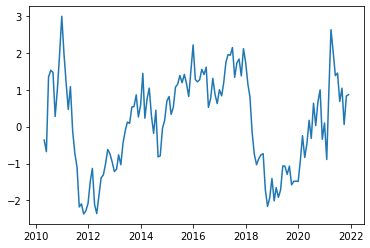

In [23]:
plt.plot(cycle_z)

미국-유럽 경기차 (36개월 Z-score)

In [25]:
momentum = (momentum_data['EUR'] - momentum_data['EUR'].rolling(window=8).mean()).dropna()
momentum_z = z_score(momentum,time_line)

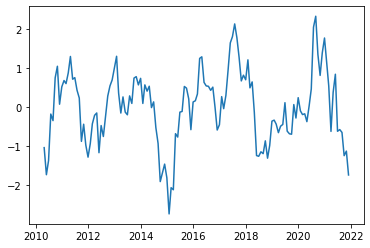

In [26]:
plt.plot(momentum_z)

유로화 모멘텀이 바닥으로 내려가고 있음을 알 수 있음. 유로화 하락세가 과거 대비해서도 강한 수준임을 추측 가능함

In [32]:
yield_diff = yield_diff_data['GTEUR2Y Govt']-yield_diff_data['usgg2yr index']
yield_diff_z = z_score(yield_diff,time_line)

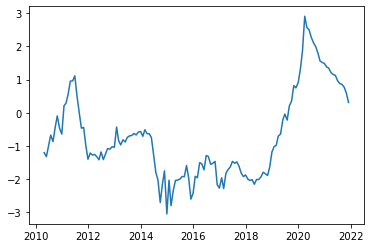

In [33]:
plt.plot(yield_diff_z)

유로존 단기 금리와 미국 단기 금리 차이의 36개월 z score가 빠르게 하락 중

In [34]:
df_z = pd.DataFrame({"cycle":cycle_z.values,"momentum":momentum_z.values,"yield_diff":yield_diff_z.values},index=cycle_z.index)
df_z['basic criteria'] = df_z.sum(axis=1)

In [35]:
df_z

,cycle,momentum,yield_diff,basic criteria
Date,,,,
2010-04-30,-0.362916,-1.042977,-1.198587,-2.604481
2010-05-31,-0.678942,-1.735991,-1.319314,-3.734247
2010-06-30,1.344833,-1.373855,-0.992369,-1.021391
2010-07-31,1.528787,-0.183319,-0.669408,0.676061
2010-08-31,1.465018,-0.350869,-0.865991,0.248158
...,...,...,...,...
2021-07-31,0.681062,-0.580383,0.884430,0.985108
2021-08-31,1.040810,-0.653579,0.856055,1.243286
2021-09-30,0.057823,-1.248268,0.772086,-0.418359
